In [20]:
import scipy
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
Xtrn_org , Ytrn_org , Xtst_org , Ytst_org = load_Q2_dataset()
Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np.mean(Xtrn , axis=0)
Xtrn_m = Xtrn - Xmean ; Xtst_m = Xtst - Xmean # Mean−normalised versions
%matplotlib inline

      min  max      mean       std
Xtrn  0.0  1.0  0.177377  0.334982
Xtst  0.0  1.0  0.175634  0.333463


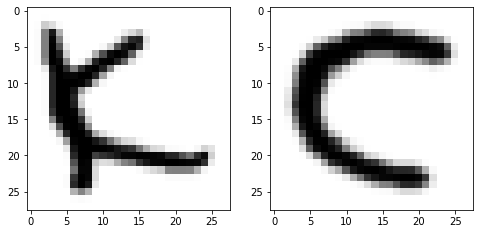

In [25]:
#2.1
def describe_data(input_array):
    return [np.min(input_array), np.max(input_array), np.mean(input_array), np.std(input_array)]

describe_df = pd.DataFrame(data=[describe_data(Xtrn),describe_data(Xtst)],
                           columns=['min','max','mean','std'], index=['Xtrn', 'Xtst'])
print(describe_df)
fig, ax = plt.subplots(1,2, figsize = (8,8))
#TODO check graph type
ax[0].imshow(Xtrn[0].reshape(28,28).T, cmap='gray_r')
ax[1].imshow(Xtrn[1].reshape(28,28).T, cmap='gray_r')

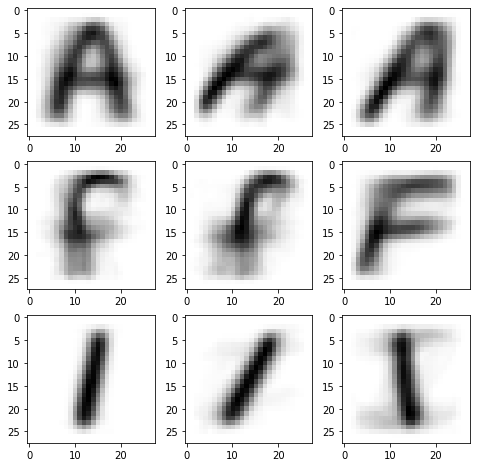

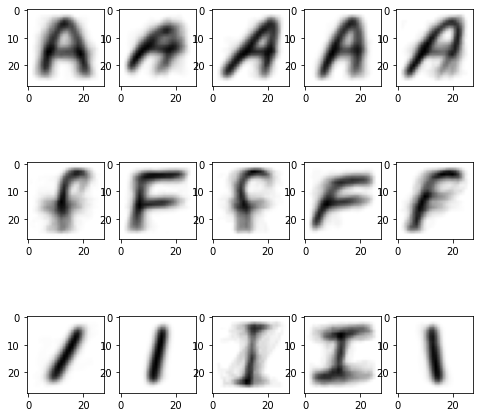

In [63]:
from sklearn.cluster import KMeans

#2.3
k_values_list = [3,5]
class_values_list = [0,5,8]
cluster_centers = dict()
for k in k_values_list:
    centres = []
    for class_values in class_values_list:
        Xtrn_selected = Xtrn[np.argwhere(Ytrn == class_values)]
        Xtrn_selected = Xtrn_selected.reshape(Xtrn_selected.shape[0],Xtrn_selected.shape[-1])
        km = KMeans(n_clusters=k, random_state=0)
        km.fit(Xtrn_selected)
        for cluster in km.cluster_centers_:
            centres.append(cluster)
    cluster_centers[k] = centres
    fig, ax = plt.subplots(3,k, figsize = (8,8))
    for i in range(3*k):
        ax[int(i / k)][i % k].imshow(centres[i].reshape(28,28).T, cmap='gray_r')

In [ ]:
# k_values
# fig, ax = plt.subplots(3,3, figsize = (8,8))
# for i in range(3*3)

# Xtrn[np.argwhere(Ytrn == 0)][0]
# plt.figure(figsize=(8,8))
# plt.imshow(Xtrn[np.argwhere(Ytrn == 0)][5].reshape(28,28).T, cmap='gray_r')
# fig, ax = plt.subplots(1,2, figsize = (8,8))
# test = Xtrn[np.argwhere(Ytrn == 0)]
# print(test.reshape(300,784).shape)
# km = KMeans(n_clusters=3, random_state=0)
# km.fit(test.reshape(300,784))
# km.cluster_centers_
# plt.figure(figsize=(8,8))
# plt.imshow(km.cluster_centers_[0].reshape(28,28).T, cmap='gray_r')

In [66]:
from sklearn.linear_model import LogisticRegression

#2.5
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(Xtrn_m, Ytrn)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn_m, Ytrn)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst_m, Ytst)))

Classification accuracy on training set: 0.916
Classification accuracy on test set: 0.722


In [82]:
lr_result = dict()
for i in range(26):
    Xtest_selected = Xtst_m[np.argwhere(Ytst == i)]
    Xtest_selected = Xtest_selected.reshape(Xtest_selected.shape[0],Xtest_selected.shape[-1])
    Ytest_selected = Ytst[np.argwhere(Ytst == i)]
    Ytest_selected = Ytest_selected.reshape(Ytest_selected.shape[0],Ytest_selected.shape[-1])
    lr_result[i] = lr.score(Xtest_selected, Ytest_selected)
lr_result = dict(sorted(lr_result.items(), key=lambda item: item[1]))
# list(lr_result.keys())[0]
for i in range(5):
    lr_result_class_num = list(lr_result.keys())[i]
    lr_result_class_result = lr_result[lr_result_class_num]
    corresponding_char = chr(ord('A')+lr_result_class_num)
    number_of_misclassification = int(len(Ytst[np.argwhere(Ytst == lr_result_class_num)]) * lr_result_class_result)
    print('Top {0} misclassified: Class number:{1} Corresponding:{2} misclassification number:{3}'
          .format(i, lr_result_class_num, corresponding_char, number_of_misclassification))

Top 0 misclassified: Class number:11 Corresponding:L misclassification number:47
Top 1 misclassified: Class number:17 Corresponding:R misclassification number:52
Top 2 misclassified: Class number:8 Corresponding:I misclassification number:57
Top 3 misclassified: Class number:10 Corresponding:K misclassification number:62
Top 4 misclassified: Class number:13 Corresponding:N misclassification number:64


In [104]:
#2.6
#a
# Turning C values / Tolerance (hyper parameters turning)
# standardization / normalization
# change solver
#b
# xxxxx
#c
lr = LogisticRegression(max_iter=1000, random_state=0, solver='newton-cg')
lr.fit(Xtrn_m, Ytrn)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(Xtrn_m, Ytrn)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(Xtst_m, Ytst)))

Classification accuracy on training set: 0.916
Classification accuracy on test set: 0.722


Describe cov matrix:
[-0.09747401775408393, 0.18378613679585537, 0.001708791632836062, 0.015808106215420965]
Describe diagonal cov matrix:
[0.0, 0.18378613679585537, 0.07231314807821396, 0.0693913123066461]
(784, 784)


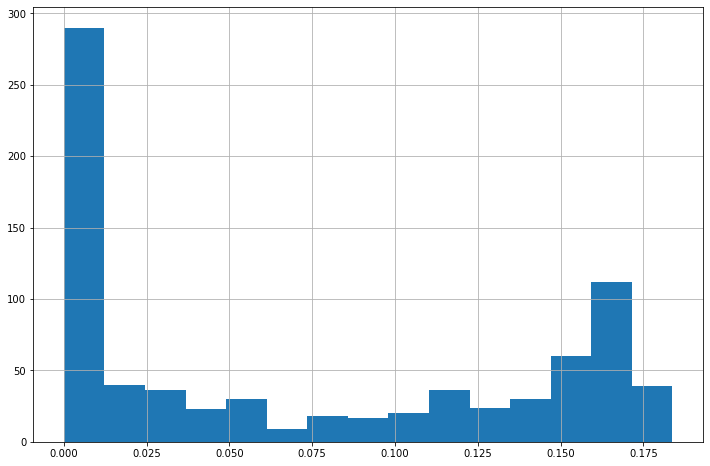

LinAlgError: singular matrix

In [167]:
from scipy.stats import multivariate_normal

#2.7
Xtrn_m_A = Xtrn_m[np.argwhere(Ytrn == 0)]
Xtrn_m_A = Xtrn_m_A.reshape(300, 784)
Xtrn_m_A_mean = np.mean(Xtrn_m_A, axis=0)
Xtrn_m_A_cov = np.cov(Xtrn_m_A, rowvar=False)
print("Describe cov matrix:")
print(describe_data(Xtrn_m_A_cov))
print("Describe diagonal cov matrix:")
print(describe_data(np.diagonal(Xtrn_m_A_cov)))
print(Xtrn_m_A_cov.shape)

plt.figure(figsize=(12,8))
plt.grid()
plt.hist(np.diagonal(Xtrn_m_A_cov), bins=15)
plt.show()

Xtst_m_A = Xtst[np.argwhere(Ytst == 0)]
Xtst_m_A = Xtst_m_A.reshape(100, 784)
mn = multivariate_normal(mean=Xtrn_m_A_mean,cov=Xtrn_m_A_cov)
mn.pdf(Xtst_m_A[0])

#diagonal matrix contains zero, causing det=0, causing it singular matrix

In [163]:
from sklearn.mixture import GaussianMixture

#2.8
Xtrn_m_A = Xtrn_m[np.argwhere(Ytrn == 0)]
Xtrn_m_A = Xtrn_m_A.reshape(300, 784)
Xtst_m_A = Xtst[np.argwhere(Ytst == 0)]
Xtst_m_A = Xtst_m_A.reshape(100, 784)
gm = GaussianMixture(n_components=1, covariance_type='full')
gm.fit(Xtrn_m_A)
gm.score(Xtst_m_A[0].reshape(1,-1))
# Xtst_m_A[0].reshape(-1,1).shape

C:\Users\moon9\.conda\envs\UoE-IAML-Coursework\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


-849467.8893915556